## Import libraries


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns


## Read the pickle file

In [8]:
covid_daily = pd.read_pickle("raw_data/coviddaily720.pkl")

covid_daily.sample(2, random_state =1)

,iso_code,casedate,location,continent,new_cases,new_deaths,population,pop_density,median_age,gdp_per_capita,hosp_beds,region
2478,BRB,2020-06-11,Barbados,North America,4.0,0.0,287371.0,664.463,39.8,16978.068,5.80,Caribbean
9526,FRA,2020-02-16,France,Europe,0.0,0.0,65273512.0,122.578,42.0,38605.671,5.98,Western Europe


## Calculate new cases and deaths by day

#### Using Groupby to summarize by new cases and deaths for all countries

In [10]:
cvd_daily_tots = covid_daily.loc[covid_daily.casedate.between('2020-02-01', '2020-07-12')].\
                                groupby(['casedate'])[['new_cases','new_deaths']].sum().reset_index()

In [14]:
cvd_daily_tots.sample(5, random_state=1)

,casedate,new_cases,new_deaths
44,2020-03-16,12386.0,757.0
47,2020-03-19,20130.0,961.0
94,2020-05-05,77474.0,3998.0
78,2020-04-19,80127.0,6005.0
160,2020-07-10,228608.0,5441.0


## Line plot for new cases and new deaths by day

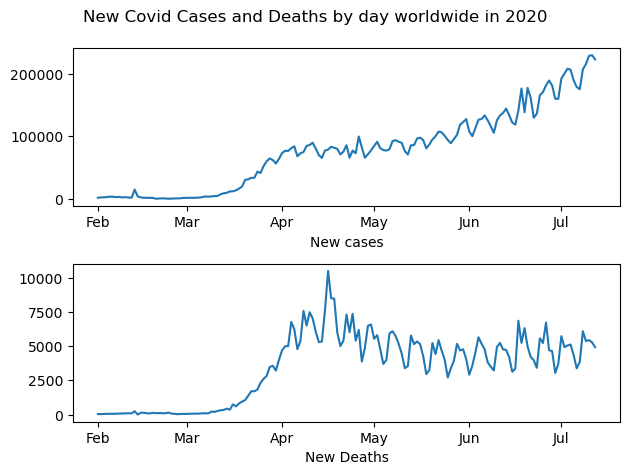

In [23]:
fig = plt.figure()

plt.suptitle("New Covid Cases and Deaths by day worldwide in 2020")
ax1 = plt.subplot(2,1,1)
ax1.plot(cvd_daily_tots.casedate, cvd_daily_tots.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New cases")

ax2 = plt.subplot(2,1,2)
ax2.plot(cvd_daily_tots.casedate, cvd_daily_tots.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))
ax2.set_xlabel("New Deaths")

plt.tight_layout()
fig.subplots_adjust(top = 0.9)
plt.show()



## Calculate new cases and deaths by day and region

In [26]:
region_totals = covid_daily.loc[covid_daily.casedate.between('2020-02-01', '2020-07-12')].\
                                groupby(['casedate', 'region'])[['new_cases','new_deaths']].sum().\
                                reset_index()

In [28]:
region_totals.sample(5)

,casedate,region,new_cases,new_deaths
924,2020-04-16,Africa (other),559.0,17.0
1273,2020-05-12,West Asia,7444.0,128.0
647,2020-03-25,South America,816.0,27.0
827,2020-04-08,North America,32189.0,1979.0
456,2020-03-10,Western Europe,3555.0,137.0


In [31]:
region_totals.region.unique()

array(['Africa (other)', 'Caribbean', 'Central Asia', 'East Asia',
       'Eastern Europe', 'North Africa', 'North America', 'Oceania / Aus',
       'South America', 'South Asia', 'West Asia', 'Western Europe',
       'Central America'], dtype=object)

## Line plots of new cases by selected regions

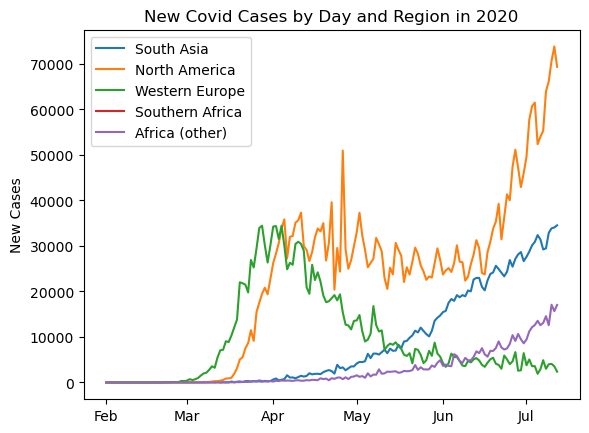

In [37]:
show_regions = ['South Asia', 'North America', 'Western Europe', 'Southern Africa', 'Africa (other)']


# Loop through regions in showregions. Do a line plot for total new_cases by day for each region.
# Use gca method to get the x-axis and set the date format

for j in range(len(show_regions)):
    rt = region_totals.loc[region_totals.region == show_regions[j],['casedate', 'new_cases']]
    plt.plot(rt.casedate, 
             rt.new_cases,
             label = show_regions[j])

plt.title("New Covid Cases by Day and Region in 2020")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

## Stacked plot

Create a dataframe af for "new_Cases" by day in Southern Africa.
Add a series for new_cases in South Africa (the countrY) to the af dataframe
Then, create a new series in the af data frame for SOuthern Africa Cases minus the South African Cases(afcasesnosa)
Seect only data from April or later since that is when we start to see an increase in new cases

In [40]:
af = region_totals.loc[region_totals.region == 'Southern Africa', ['casedate', 'new_cases']].\
                        rename(columns = {'new_cases' :'afcases'})

In [42]:
sa = covid_daily.loc[covid_daily.location == 'South Africa', ['casedate', 'new_cases']].\
                    rename(columns = {'new_cases' : 'sacases'})

## Merge the two dataframes

In [46]:
af = pd.merge(af,sa, left_on = ['casedate'], right_on = ['casedate'], how = 'left')

In [50]:
af.fillna(0, inplace = True)

af['afcasesnosa'] = af.afcases-af.sacases


afabb= af.loc[af.casedate.between('2020-04-01', '2020-07-12')]



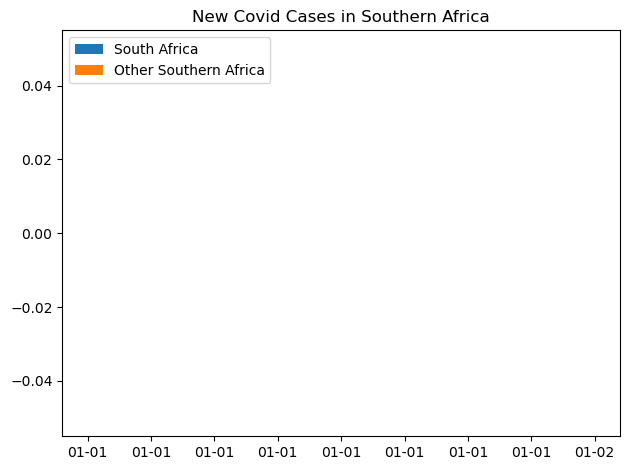

In [52]:
fig = plt.figure()

ax = plt.subplot()
ax.stackplot(afabb.casedate,
             afabb.sacases, 
             afabb.afcasesnosa,
             labels = ['South Africa', 'Other Southern Africa'])

ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New Covid Cases in Southern Africa")
plt.tight_layout()
plt.legend(loc = "upper left")
plt.show()